# Using Dummies

## Importing Libraries

In [1]:
## Import the libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

df = pd.read_excel('Helper_Data.xlsx',sheet_name ='Dummies')

#Check columns
df.columns
df

,Date,Period,Volatility,Reforms
0,19890101,Jan-1989,40.000000,Pre-reforms
1,19890201,Feb-1989,40.304563,Pre-reforms
2,19890301,Mar-1989,40.487463,Pre-reforms
3,19890401,Apr-1989,40.569019,Pre-reforms
4,19890501,May-1989,40.572737,Pre-reforms
...,...,...,...,...
91,19960801,Aug-1996,33.133106,Post-reforms
92,19960901,Sep-1996,32.926494,Post-reforms
93,19961001,Oct-1996,32.609170,Post-reforms
94,19961101,Nov-1996,32.560896,Post-reforms


## Visualizing Data

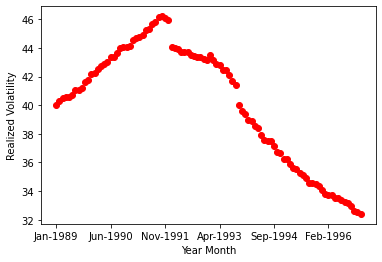

In [2]:
plt.scatter(df.Period,df.Volatility, marker='o',color="red")
plt.xlabel("Year Month")
plt.ylabel("Realized Volatility")
plt.xticks(np.arange(0, len(df.Period)+1, 17))
plt.show()

## Creating Dummies

In [3]:
df

,Date,Period,Volatility,Reforms
0,19890101,Jan-1989,40.000000,Pre-reforms
1,19890201,Feb-1989,40.304563,Pre-reforms
2,19890301,Mar-1989,40.487463,Pre-reforms
3,19890401,Apr-1989,40.569019,Pre-reforms
4,19890501,May-1989,40.572737,Pre-reforms
...,...,...,...,...
91,19960801,Aug-1996,33.133106,Post-reforms
92,19960901,Sep-1996,32.926494,Post-reforms
93,19961001,Oct-1996,32.609170,Post-reforms
94,19961101,Nov-1996,32.560896,Post-reforms


In [4]:
#df=pd.get_dummies(df, prefix=['FDIDummy'], columns=['FDI'],drop_first=True)
#df.columns
pd.get_dummies(df, prefix=['FDIDummy'], columns=['Reforms'])

,Date,Period,Volatility,FDIDummy_Post-reforms,FDIDummy_Pre-reforms
0,19890101,Jan-1989,40.000000,0,1
1,19890201,Feb-1989,40.304563,0,1
2,19890301,Mar-1989,40.487463,0,1
3,19890401,Apr-1989,40.569019,0,1
4,19890501,May-1989,40.572737,0,1
...,...,...,...,...,...
91,19960801,Aug-1996,33.133106,1,0
92,19960901,Sep-1996,32.926494,1,0
93,19961001,Oct-1996,32.609170,1,0
94,19961101,Nov-1996,32.560896,1,0


In [5]:
df=pd.get_dummies(df, prefix=['FDIDummy'], columns=['Reforms'],drop_first=True)
df


,Date,Period,Volatility,FDIDummy_Pre-reforms
0,19890101,Jan-1989,40.000000,1
1,19890201,Feb-1989,40.304563,1
2,19890301,Mar-1989,40.487463,1
3,19890401,Apr-1989,40.569019,1
4,19890501,May-1989,40.572737,1
...,...,...,...,...
91,19960801,Aug-1996,33.133106,0
92,19960901,Sep-1996,32.926494,0
93,19961001,Oct-1996,32.609170,0
94,19961101,Nov-1996,32.560896,0


## Regression without Dummies

In [6]:
#Without dummy
X=df.Date
Y=df.Volatility
X = sm.add_constant(X)
olsresult = sm.OLS(Y, X).fit()
olsresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Volatility   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     160.0
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           5.26e-22
Time:                        14:11:50   Log-Likelihood:                -225.27
No. Observations:                  96   AIC:                             454.5
Df Residuals:                      94   BIC:                             459.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2908.7274    226.777     12.826      0.000    2458.457    3358.998
Date          -0.0001   1.14e-05    -12.649      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       13.591   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.213
Skew:                          -0.109   Prob(JB):                        0.122
Kurtosis:                       1.997   Cond. No.                     1.73e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression with Dummies

In [ ]:
#With dummies
X=df[['FDIDummy_Pre-reforms']]
Y=df.Volatility
X = sm.add_constant(X)
olsresult = sm.OLS(Y, X).fit()
olsresult.summary()
